In [1]:
#https://github.com/HurinHu/GoogleNews/blob/master/README.md
from datetime import datetime
import numpy as np
import pandas as pd
import time
import re
from tqdm import tqdm
import json 
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stichwortsuche Google Robert Enke

In [25]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')

In [26]:
googlenews.search('allintext:"Robert Enke"')

In [27]:
attributes=["title","media","date","description","link"]
json_list=[]

for page_no in tqdm(range(1,150)):
    googlenews.getpage(page_no)
    for search_result in googlenews.result():
        json_file={k:np.nan for k in attributes}

        json_file["title"]=search_result["title"]
        json_file["media"]=search_result["media"]
        json_file["date"]=search_result["date"]
        json_file["description"]=search_result["desc"]
        json_file["link"]=search_result["link"]

        json_list.append(json_file)
    googlenews.clear()

100%|██████████| 149/149 [03:39<00:00,  1.47s/it]


In [30]:
df=pd.DataFrame(json_list)

In [31]:
df.shape

(152, 5)

In [32]:
df.head()

,title,media,date,description,link
0,Selbstmord – Nationaltorwart Robert Enke ist tot,WELT ONLINE,10.11.2009,Der deutsche Nationaltorwart Robert Enke hat s...,https://www.welt.de/sport/fussball/article5162...
1,Bewegender Abschied von Robert Enke,Spiegel Online,15.11.2009,Die Anteilnahme war überwältigend: 35.000 Mens...,https://www.spiegel.de/sport/fussball/trauerfe...
2,Der Plan der Witwe,sueddeutsche.de,09.11.2010,Robert Enke: Todestag:Der Plan der Witwe. Ein ...,https://www.sueddeutsche.de/sport/vor-dem-erst...
3,Bierhoff weint um Enke – Länderspiel abgesagt,WELT ONLINE,11.11.2009,Der Deutsche Fußball-Bund hat das Testspiel ge...,https://www.welt.de/sport/article5174526/Bierh...
4,Experte: Enke plante Selbstmord lange vorher,T-Online,13.11.2009,Hatte der an Depressionen erkrankte Robert Enk...,https://www.t-online.de/sport/id_20564724/robe...


In [33]:
df.tail()

,title,media,date,description,link
147,Andrés Iniesta spricht offen über Depressionen...,Sportbuzzer,27.11.2018,Im November 2009 hatte sich der deutsche Natio...,https://www.sportbuzzer.de/artikel/andres-inie...
148,Fußball: Wenn Tod und Hass durchrutschen,Tagesspiegel,19.01.2010,„Die Rivalität zwischen diesen Klubs wird durc...,https://www.tagesspiegel.de/sport/fanplakate-f...
149,"„Deisler sagte: ‚Herr Hoeneß, es geht nicht me...",DIE WELT,05.11.2019,Robert Enke hatte sich am 10. November 2009 im...,https://www.welt.de/print/die_welt/sport/artic...
150,Männer nach Enke-Suizid offener bei Depressionen,Deutsches Ärzteblatt,28.10.2019,Eichstätt-Ingolstadt – Seit dem Suizid des ein...,https://www.aerzteblatt.de/nachrichten/106991/...
151,Selbstmordgedanken,Deutschlandfunk Kultur,09.12.2018,Die Robert-Enke-Stiftung hat in Zusammenarbeit...,https://www.deutschlandfunkkultur.de/suizid-un...


In [34]:
df["year"]=df["date"].apply(lambda x: x[-4:])

In [35]:
with pd.ExcelWriter(r'C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Robert_Enke].xlsx') as writer:
    df.to_excel(writer)

In [244]:
df=pd.read_excel(r"C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Robert_Enke].xlsx")

In [36]:
df["date_2"]=df.apply(lambda x: pd.to_datetime(int(x["year"]),format="%Y"),axis=1)

Text(0.5, 1.0, "Google News Results for the key word 'Robert Enke'")

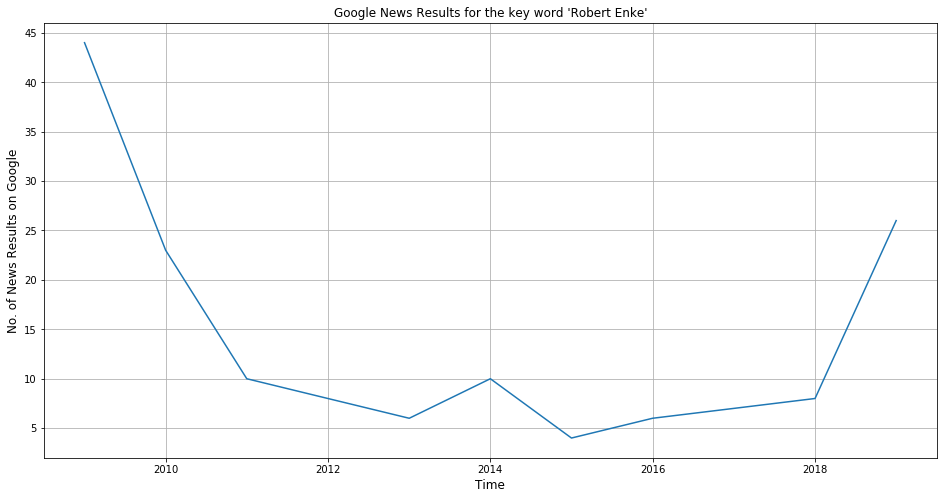

In [37]:
no_of_news=df.groupby("date_2").count()
fig,sub=plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x=no_of_news.index,y=no_of_news["title"],ax=sub)
sub.grid()
sub.set_ylabel("No. of News Results on Google",fontdict={"fontsize":12})
sub.set_xlabel("Time",fontdict={"fontsize":12})
sub.set_title("Google News Results for the key word 'Robert Enke'")

In [38]:
df_value_counts=df["media"].value_counts()

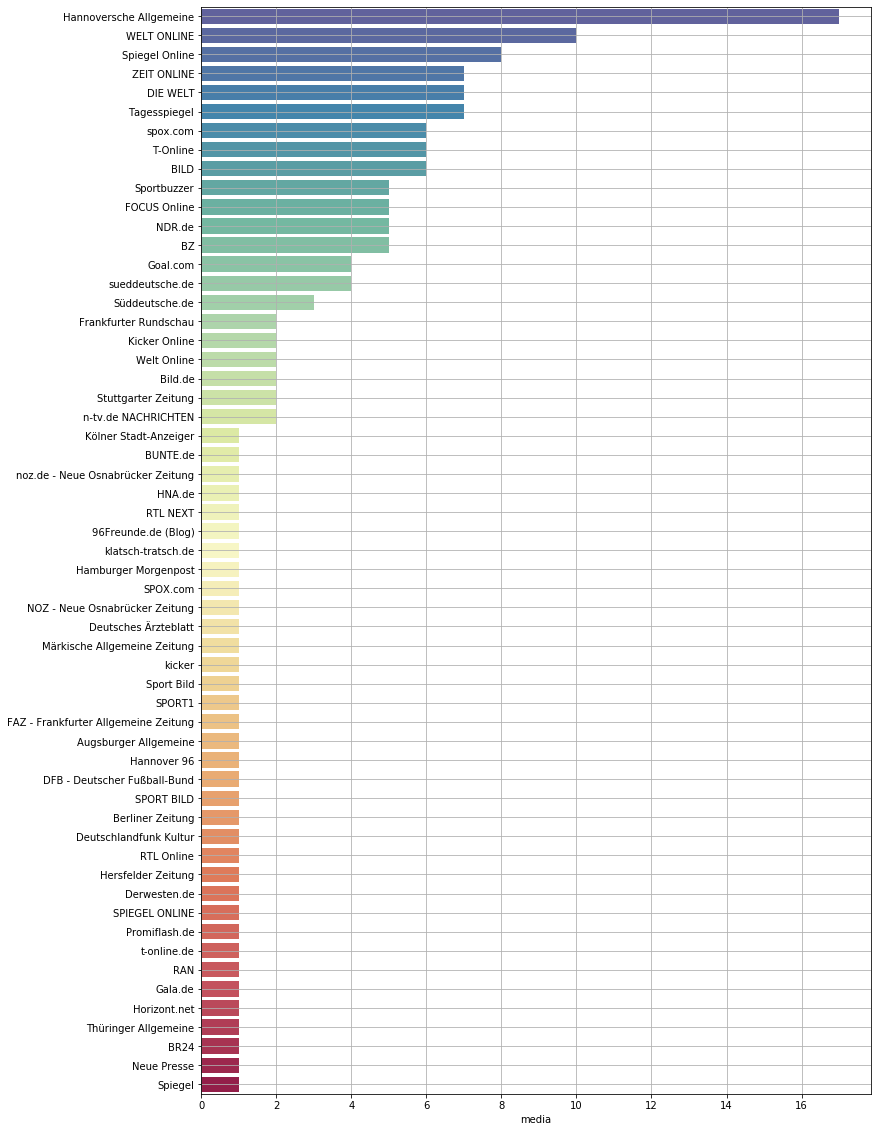

In [39]:
fig,sub=plt.subplots(1,1,figsize=(12,20))
sns.barplot(x=df_value_counts,y=df_value_counts.index,orient="horizontal",ax=sub,palette="Spectral_r")
sub.grid();

In [40]:
df_19=df[df["date_2"]<pd.to_datetime("2010",format="%Y")]

In [41]:
df_19.shape

(44, 7)

In [43]:
word_list=[]

for i in range(0,43,1):
    [word_list.append(word) for word in df_19.iloc[i].loc["description"].split()]

In [44]:
text=" ".join(word_list)

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopset = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbwes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 1199.5, 999.5, -0.5)

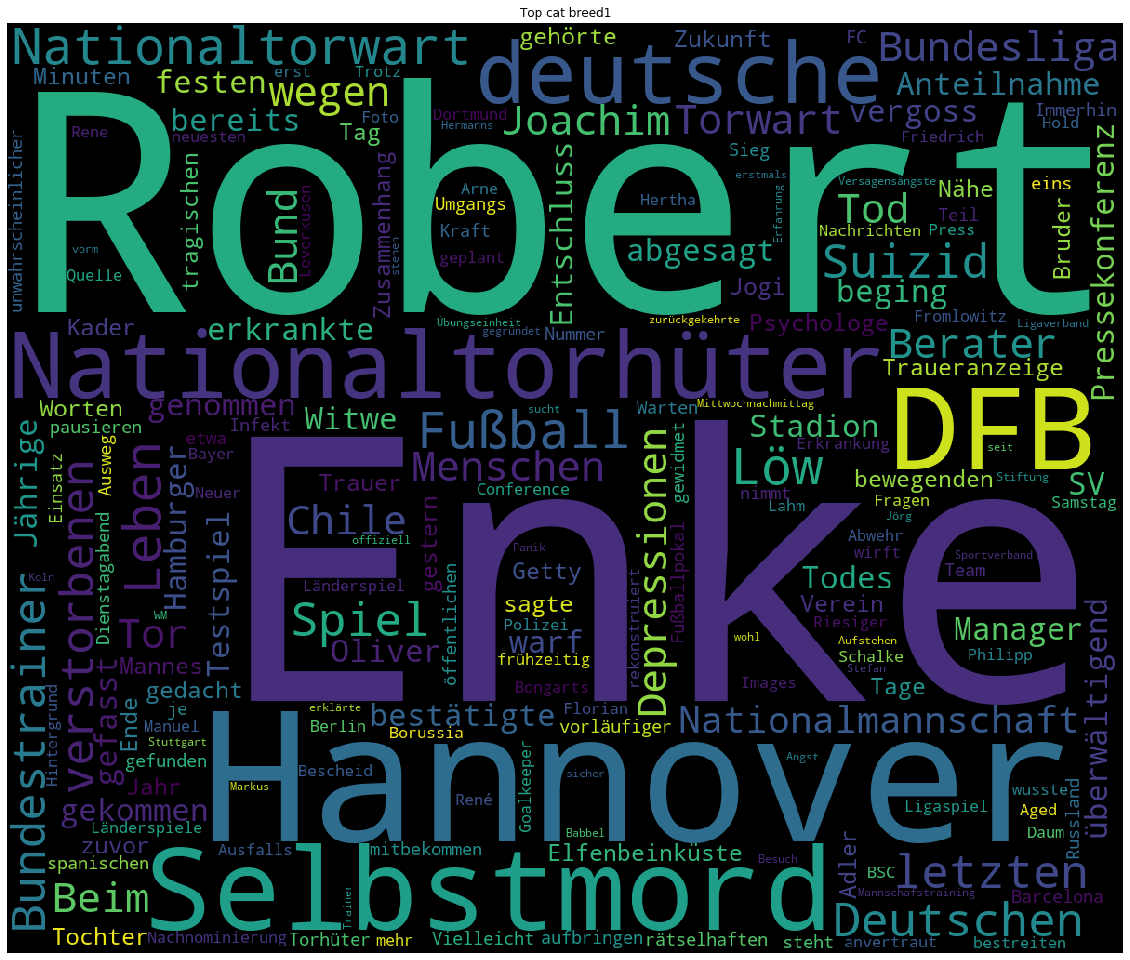

In [47]:
fig,sub1=plt.subplots(1,1,figsize=(20,18))

wordcloud=WordCloud(stopwords=stopset,max_font_size=None,background_color="black",collocations=False,width=1200,height=1000).generate(text)
sub1.imshow(wordcloud)
sub1.set_title("Top cat breed1")
sub1.axis("off")

# Stichwortsuche Depressionen im Sport

In [48]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')
googlenews.search('allintext:Depression+Sport')

In [49]:
attributes=["title","media","date","description","link"]
json_list=[]

for page_no in tqdm(range(1,100)):
    googlenews.getpage(page_no)
    for search_result in googlenews.result():
        json_file={k:np.nan for k in attributes}

        json_file["title"]=search_result["title"]
        json_file["media"]=search_result["media"]
        json_file["date"]=search_result["date"]
        json_file["description"]=search_result["desc"]
        json_file["link"]=search_result["link"]

        json_list.append(json_file)
    googlenews.clear()

100%|██████████| 99/99 [02:23<00:00,  1.45s/it]


In [50]:
df=pd.DataFrame(json_list)

In [52]:
df.shape

(0, 0)

In [219]:
df["title"].unique()[-5:]

array(['Das Netz diskutiert rege: Welche Farben hat dieser Schuh?',
       'Kardashian-Schwester Kylie Jenner bringt Mädchen zur Welt',
       'Modernster Schießstand Südwestfalens steht in Wittgenstein',
       'Silvester 2019: Warum Bleigießen verboten ist',
       '„Inge“ spürt verlassene Firmen, Schlachthöfe und Villen auf'],
      dtype=object)

In [220]:
df["year"]=df["date"].apply(lambda x: x[-4:])

In [221]:
with pd.ExcelWriter(r'C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Depression_im_Sport].xlsx') as writer:
    df.to_excel(writer)

In [53]:
df=pd.read_excel(r"C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Depression_im_Sport].xlsx")

In [54]:
df["date_2"]=df.apply(lambda x: pd.to_datetime(int(x["year"]),format="%Y"),axis=1)

Text(0.5, 1.0, "Google News Results for the key word 'Depression im Sport'")

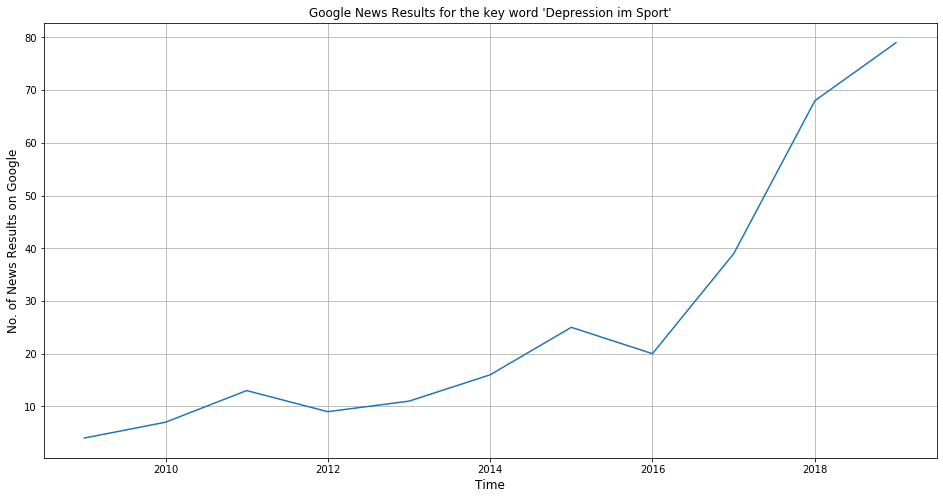

In [55]:
no_of_news=df.groupby("date_2").count()
fig,sub=plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x=no_of_news.index,y=no_of_news["title"],ax=sub)
sub.grid()
sub.set_ylabel("No. of News Results on Google",fontdict={"fontsize":12})
sub.set_xlabel("Time",fontdict={"fontsize":12})
sub.set_title("Google News Results for the key word 'Depression im Sport'")

In [56]:
df.head()

,Unnamed: 0,title,media,date,description,link,year,date_2
0,0,Depression im Sport: Robert Enke ist kein Einz...,NDR.de,7 nov. 2019,NaN,https://www.ndr.de/sport/fussball/Depression-i...,2019,2019-01-01
1,1,"Enkes zehnter Todestag: ""Was wäre, wenn ...?""",NDR.de,10 nov. 2019,NaN,https://www.ndr.de/sport/fussball/Zehnter-Tode...,2019,2019-01-01
2,2,Sport ist signifikant wirksam,Pharmazeutische Zeitung online,21 févr. 2018,Bewegung wird daher auch in der Nationalen Ver...,https://www.pharmazeutische-zeitung.de/ausgabe...,2018,2018-01-01
3,3,Sport hilft so gut wie Antidepressivum,Ärzte Zeitung,2 déc. 2013,Moderater Nutzen bei Depressionen. Als Maß für...,https://www.aerztezeitung.de/Medizin/Sport-hil...,2013,2013-01-01
4,4,Sport vertreibt selbst schwere Depressionen,FOCUS Online,25 août 2011,Den Betroffenen einer Depression geht es nach ...,https://www.focus.de/gesundheit/ratgeber/depre...,2011,2011-01-01
